# **Task 9**

## Question 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Question 2

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
imputer = SimpleImputer()
imputer.fit_transform(df, df.median())

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [7]:
X = df.drop(columns = 'Outcome')
y = df['Outcome']

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

scaler.fit_transform(X)

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [10]:
X = pd.DataFrame(X, columns = df.columns[0:8])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Question 3

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred = model.predict(X_test)
y_class = y_pred

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [17]:
print("Accuracy: "+ str(accuracy_score(y_pred, y_test)))
print("Precision: "+str(precision_score(y_pred, y_test)))
print("recall: "+str(recall_score(y_pred, y_test)))

Accuracy: 0.7662337662337663
Precision: 0.5873015873015873
recall: 0.7872340425531915


## Question 4

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = model.predict(X_test)
y_trees = y_pred

In [21]:
print("Accuracy: "+ str(accuracy_score(y_pred, y_test)))
print("Precision: "+str(precision_score(y_pred, y_test)))
print("recall: "+str(recall_score(y_pred, y_test)))

Accuracy: 0.7012987012987013
Precision: 0.6031746031746031
recall: 0.6440677966101694


## Question 5

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [23]:
import matplotlib.pyplot as plt

In [24]:
c1 = confusion_matrix(y_pred, y_class)
c2 = confusion_matrix(y_pred, y_trees)

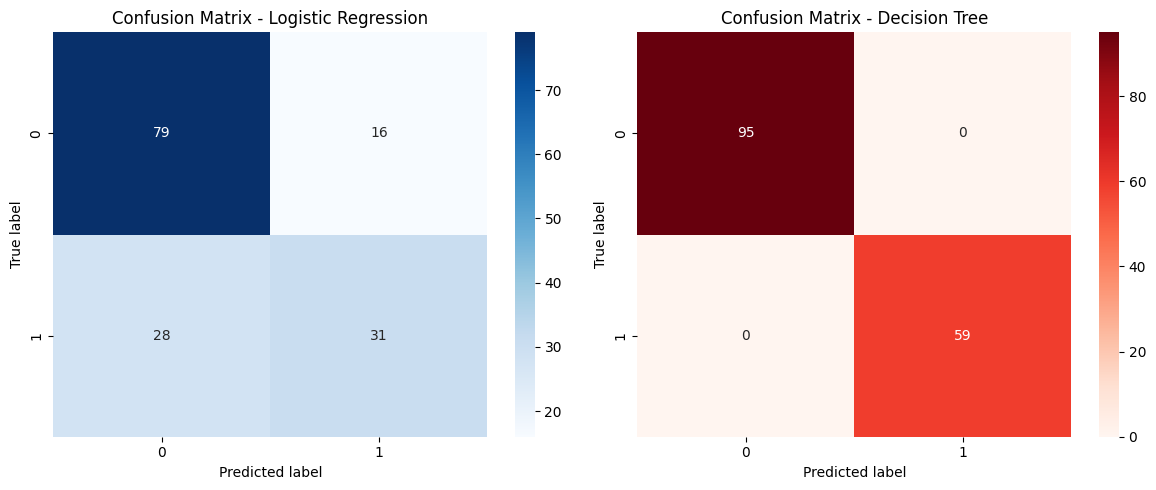

In [31]:
plot1 = ConfusionMatrixDisplay(confusion_matrix = c1)
plot2 = ConfusionMatrixDisplay(confusion_matrix = c2)

plot1.plot(cmap = 'Blues')
plot2.plot(cmap = )

Decision Tress have better accurace score and confusion matrx shows that all of the labels that are predicted are true